In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.widgets import Cursor
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from sympy import *
plt.rcParams.update({'font.size': 12})
formatter = mticker.ScalarFormatter(useMathText=True)
plt.rcParams["axes.formatter.use_mathtext"] = True

In [2]:
dir_name_ruido = './Dados/ruido/'

In [33]:
def list_dir(dir_name, traversed = [], results = []): 
    dirs = os.listdir(dir_name)
    if dirs:
        for f in dirs:
            new_dir = dir_name + f + '/'
            if os.path.isdir(new_dir) and new_dir not in traversed:
                traversed.append(new_dir)
                list_dir(new_dir, traversed, results)
            else:
                results.append(new_dir[:-1])  
    return results

def arquivos_lista(dir_name):
    arquivos_lista = []
    for file_name in list_dir(dir_name):
           arquivos_lista.append(file_name) # sample with file size
    return arquivos_lista


def dados(arquivos_lista):
    arquivos = []
    for arquivo in arquivos_lista:
       df = pd.read_csv(arquivo, sep=";", decimal = ',')
       dados_array = np.array(df)
       arquivos.append(dados_array)
    return arquivos

teste = dados(arquivos_lista(dir_name_ruido))

teste[0][0][0]

-5.0

In [44]:
media_y = []
data_y = []
for i in range(len(teste)):
    for j in range(len(teste[i])):
        if len(data_y) < len(teste[i]):
            data_y.append(0)
        data_y[j] += teste[i][j][1] 

for dado in data_y:
    media_y.append(dado/10)

media_y[0] = media_y[1]

media_df = pd.DataFrame(media_y)
media_df.to_csv('./Dados/ruido_medio.csv', header=False)

plot_x = []
for i in range(len(media_y)):
    plot_x.append(teste[0][i][0])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


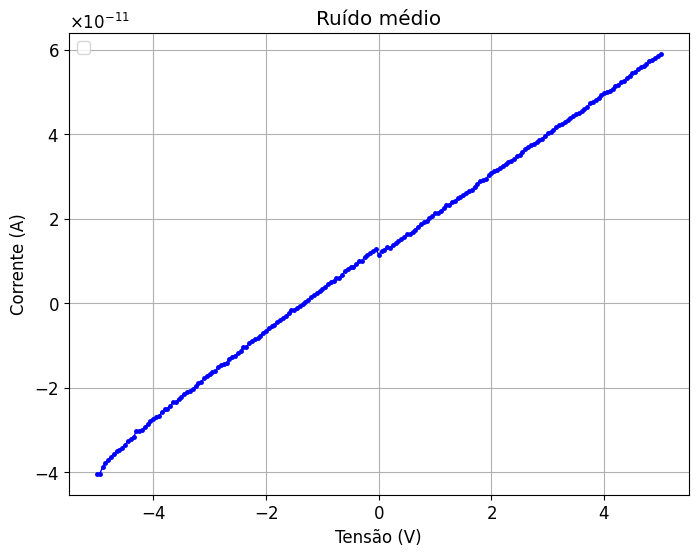

In [43]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
# plot dos pontos:
grafico3 = grafico.plot(plot_x, media_y, marker = '.', markersize=5, color = 'blue', linewidth = 1)

# grafico.axhline(y = 0, color = 'grey')


grafico.grid(True)
grafico.set_xlabel('Tensão (V)') # eixo x
grafico.set_ylabel('Corrente (A)') # eixo y
grafico.set_title('Ruído médio') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()
